In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder ,  StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier ,AdaBoostClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from imblearn.combine import SMOTETomek

## Titanic Dataset

In [2]:
data = pd.read_csv("Dataset/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

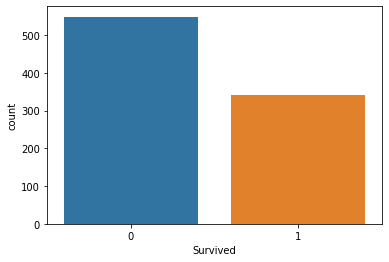

In [3]:
sns.countplot(data["Survived"])

## Preprocessing:

In [4]:
data.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Convert Categorical to Numerical

### OHE

In [6]:
data = pd.get_dummies(data,columns=["Embarked"])

In [7]:
X = data.drop("Survived",axis=1)
Y = data.Survived.values

In [8]:
X["Sex"] = LabelEncoder().fit_transform(X["Sex"])

### Missing values

In [9]:
X.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [10]:
knn_imp = KNNImputer()
X = knn_imp.fit_transform(X)

### Scaling

In [11]:
SS = StandardScaler()
X = SS.fit_transform(X)

### Balance:
### SMOTETomek

In [12]:
ST = SMOTETomek(random_state=10)
X,Y = ST.fit_resample(X,Y)

In [13]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

### KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)

In [15]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        89
           1       0.88      0.88      0.88       113

    accuracy                           0.86       202
   macro avg       0.86      0.86      0.86       202
weighted avg       0.86      0.86      0.86       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


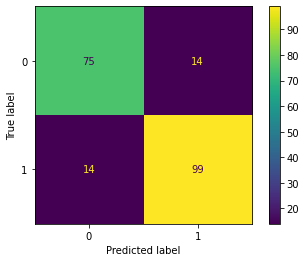

In [16]:
metrics.plot_confusion_matrix(knn,x_test,y_test)

### SVC

In [17]:
svc = SVC(kernel="rbf",C=0.5,random_state=300,verbose=True)
svc.fit(x_train,y_train)
predict_svm = svc.predict(x_test)

[LibSVM]

In [18]:
print(metrics.classification_report(y_test,predict_svm))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        89
           1       0.87      0.80      0.83       113

    accuracy                           0.82       202
   macro avg       0.82      0.83      0.82       202
weighted avg       0.83      0.82      0.82       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


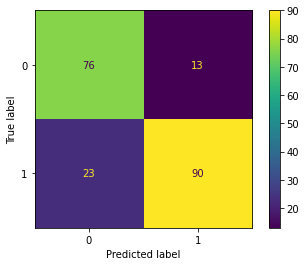

In [19]:
metrics.plot_confusion_matrix(svc,x_test,y_test)

### RandomForestClassifier

In [20]:
RF = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=242)
RF.fit(x_train,y_train)
predict_rf = RF.predict(x_test)

In [21]:
print(metrics.classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        89
           1       0.95      0.92      0.94       113

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


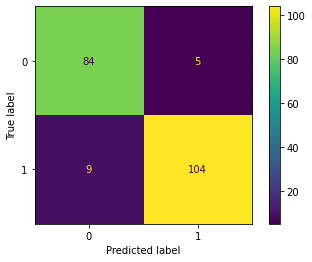

In [22]:
metrics.plot_confusion_matrix(RF,x_test,y_test)

### AdaBoostClassifier

In [23]:
adaboost = AdaBoostClassifier(random_state=242)
adaboost.fit(x_train,y_train)
predict_ab = adaboost.predict(x_test)

In [24]:
print(metrics.classification_report(y_test,predict_ab))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        89
           1       0.86      0.85      0.86       113

    accuracy                           0.84       202
   macro avg       0.84      0.84      0.84       202
weighted avg       0.84      0.84      0.84       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


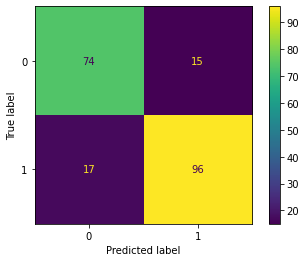

In [25]:
metrics.plot_confusion_matrix(adaboost,x_test,y_test)

### GBoostingClassifier

In [26]:
Gboost = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01,subsample=0.9,min_samples_split=10,max_depth=2,random_state=25)
Gboost.fit(x_train,y_train)
predict_gb = Gboost.predict(x_test)

In [27]:
print(metrics.classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        89
           1       0.90      0.86      0.88       113

    accuracy                           0.87       202
   macro avg       0.86      0.87      0.87       202
weighted avg       0.87      0.87      0.87       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


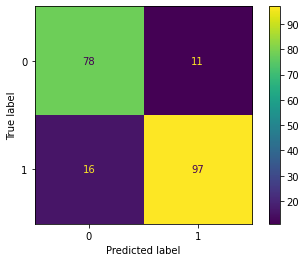

In [28]:
metrics.plot_confusion_matrix(Gboost,x_test,y_test)

### XGBoostClassifier

In [29]:
XGboost = XGBRFClassifier(learning_rate=0.05,subsample=0.5,reg_lambda=0.3)
XGboost.fit(x_train,y_train)
predict_xb = XGboost.predict(x_test)

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
print(metrics.classification_report(y_test,predict_xb))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        89
           1       0.90      0.85      0.87       113

    accuracy                           0.86       202
   macro avg       0.86      0.86      0.86       202
weighted avg       0.86      0.86      0.86       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


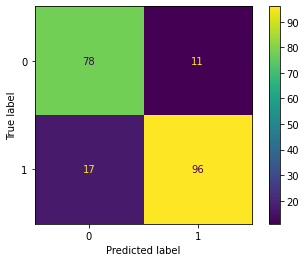

In [31]:
metrics.plot_confusion_matrix(XGboost,x_test,y_test)

### CatBoostClassifier

In [32]:
catboost = CatBoostClassifier(iterations=200,learning_rate=0.55,eval_metric="Accuracy",task_type="GPU",random_state=5)
catboost.fit(x_train,y_train,[],eval_set=(x_test,y_test))

0:	learn: 0.8415842	test: 0.8267327	best: 0.8267327 (0)	total: 11.9ms	remaining: 2.37s
1:	learn: 0.8688119	test: 0.8465347	best: 0.8465347 (1)	total: 22.9ms	remaining: 2.27s
2:	learn: 0.8799505	test: 0.8663366	best: 0.8663366 (2)	total: 33.6ms	remaining: 2.2s
3:	learn: 0.8824257	test: 0.8663366	best: 0.8663366 (2)	total: 43.8ms	remaining: 2.15s
4:	learn: 0.9059406	test: 0.8663366	best: 0.8663366 (2)	total: 54.2ms	remaining: 2.11s
5:	learn: 0.9158416	test: 0.8712871	best: 0.8712871 (5)	total: 66.1ms	remaining: 2.14s
6:	learn: 0.9207921	test: 0.8762376	best: 0.8762376 (6)	total: 76.3ms	remaining: 2.1s
7:	learn: 0.9282178	test: 0.8712871	best: 0.8762376 (6)	total: 86.4ms	remaining: 2.07s
8:	learn: 0.9306931	test: 0.8613861	best: 0.8762376 (6)	total: 98.1ms	remaining: 2.08s
9:	learn: 0.9331683	test: 0.8613861	best: 0.8762376 (6)	total: 106ms	remaining: 2.01s
10:	learn: 0.9331683	test: 0.8663366	best: 0.8762376 (6)	total: 116ms	remaining: 2s
11:	learn: 0.9381188	test: 0.8712871	best: 0.8762

In [33]:
catboost.best_score_

{'learn': {'Accuracy': 1.0, 'Logloss': 0.006375697579714332},
 'validation': {'Accuracy': 0.9207920792079208,
  'Logloss': 0.30235366065903463}}

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


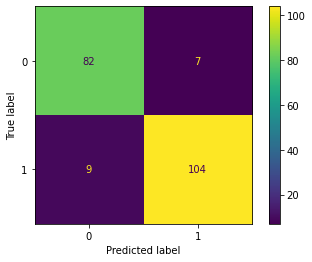

In [34]:
metrics.plot_confusion_matrix(catboost,x_test,y_test)

In [35]:
predict_cat = catboost.predict(x_test)
print(metrics.classification_report(y_test,predict_cat))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        89
           1       0.94      0.92      0.93       113

    accuracy                           0.92       202
   macro avg       0.92      0.92      0.92       202
weighted avg       0.92      0.92      0.92       202



In [36]:
acc = [{"Algorithm":"KNeighbors",'Accuracy': metrics.accuracy_score(y_test,predict_knn),'Precision': metrics.precision_score(y_test,predict_knn),'Recall': metrics.recall_score(y_test,predict_knn),'F1-score': metrics.f1_score(y_test,predict_knn)},
       {"Algorithm":"SVM", 'Accuracy': metrics.accuracy_score(y_test,predict_svm),'Precision': metrics.precision_score(y_test,predict_svm),'Recall': metrics.recall_score(y_test,predict_svm),'F1-score': metrics.f1_score(y_test,predict_svm)},
        {"Algorithm":"RandomForest",'Accuracy': metrics.accuracy_score(y_test,predict_rf),'Precision': metrics.precision_score(y_test,predict_rf),'Recall': metrics.recall_score(y_test,predict_rf),'F1-score': metrics.f1_score(y_test,predict_rf)},
        {"Algorithm":"Adaboost", 'Accuracy': metrics.accuracy_score(y_test,predict_ab),'Precision': metrics.precision_score(y_test,predict_ab),'Recall': metrics.recall_score(y_test,predict_ab),'F1-score': metrics.f1_score(y_test,predict_ab)},
        {"Algorithm":"Gboost",'Accuracy': metrics.accuracy_score(y_test,predict_gb),'Precision': metrics.precision_score(y_test,predict_gb),'Recall': metrics.recall_score(y_test,predict_gb),'F1-score': metrics.f1_score(y_test,predict_gb)},
        {"Algorithm":"XGboost",'Accuracy': metrics.accuracy_score(y_test,predict_xb),'Precision': metrics.precision_score(y_test,predict_xb),'Recall': metrics.recall_score(y_test,predict_xb),'F1-score': metrics.f1_score(y_test,predict_xb)},
        {"Algorithm":"Catboost",'Accuracy': metrics.accuracy_score(y_test,predict_cat),'Precision': metrics.precision_score(y_test,predict_cat),'Recall': metrics.recall_score(y_test,predict_cat),'F1-score': metrics.f1_score(y_test,predict_cat)}
       ] 


In [37]:
accurac = pd.DataFrame.from_dict(acc)
accurac

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KNeighbors,0.861386,0.876106,0.876106,0.876106
1,SVM,0.821782,0.873786,0.796460,0.833333
2,RandomForest,0.930693,0.954128,0.920354,0.936937
3,Adaboost,0.841584,0.864865,0.849558,0.857143
4,Gboost,0.866337,0.898148,0.858407,0.877828
5,XGboost,0.861386,0.897196,0.849558,0.872727
6,Catboost,0.920792,0.936937,0.920354,0.928571
